In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data/creditcard_sampledata_3.csv')

In [5]:
df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,258647,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,...,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,189.00,0
1,69263,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,...,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.17,0
2,96552,1.067973,-0.656667,1.029738,0.253899,-1.172715,0.073232,-0.745771,0.249803,1.383057,...,-0.189315,-0.426743,0.079539,0.129692,0.002778,0.970498,-0.035056,0.017313,59.98,0
3,281898,0.119513,0.729275,-1.678879,-1.551408,3.128914,3.210632,0.356276,0.920374,-0.160589,...,-0.335825,-0.906171,0.108350,0.593062,-0.424303,0.164201,0.245881,0.071029,0.89,0
4,86917,1.271253,0.275694,0.159568,1.003096,-0.128535,-0.608730,0.088777,-0.145336,0.156047,...,0.031958,0.123503,-0.174528,-0.147535,0.735909,-0.262270,0.015577,0.015955,6.53,0


In [7]:
df.columns

Index(['Unnamed: 0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
df['Class'].value_counts()

0    5000
1      50
Name: Class, dtype: int64

In [9]:
df['Class'].value_counts()/len(df.index)

0    0.990099
1    0.009901
Name: Class, dtype: float64

In [10]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Original Data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
model_o = LogisticRegression()

In [15]:
model_o.fit(X_train, y_train)

LogisticRegression()

In [16]:
#R^2 --> Accuracy
model_o.score(X_train, y_train)

0.9967821782178218

In [17]:
model_o.score(X_test, y_test)

0.995049504950495

In [18]:
yhat_test = model_o.predict(X_test)

In [19]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

In [21]:
cm_o = confusion_matrix(y_true = y_test, y_pred = yhat_test)

In [22]:
print('Confusion matrix:\n', cm_o)

Confusion matrix:
 [[996   2]
 [  3   9]]


In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_true = y_test, y_pred = yhat_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       998
           1       0.82      0.75      0.78        12

    accuracy                           1.00      1010
   macro avg       0.91      0.87      0.89      1010
weighted avg       0.99      1.00      0.99      1010



## Resampling Data

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
sm = SMOTE()

In [28]:
X_resample, y_resample = sm.fit_resample(X_train, y_train)

In [29]:
model_rs = LogisticRegression()

In [30]:
model_rs.fit(X_resample, y_resample)

LogisticRegression()

In [31]:
#R^2
model_rs.score(X_resample, y_resample)

0.9910044977511244

In [32]:
model_rs.score(X_test, y_test)

0.9861386138613861

In [33]:
yhat_test_rs = model_rs.predict(X_test)

In [34]:
cm_rs = confusion_matrix(y_true = y_test, y_pred = yhat_test_rs)

In [35]:
print('Confusion matrix:\n', cm_rs)

Confusion matrix:
 [[985  13]
 [  1  11]]


In [36]:
print(classification_report(y_true = y_test, y_pred = yhat_test_rs))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       998
           1       0.46      0.92      0.61        12

    accuracy                           0.99      1010
   macro avg       0.73      0.95      0.80      1010
weighted avg       0.99      0.99      0.99      1010



In [37]:
## ROC curve
from sklearn.metrics import roc_auc_score, roc_curve

In [38]:
yhat_test_proba = model_rs.predict_proba(X_test)

In [39]:
yhat_test_proba[0:5]

array([[9.99966376e-01, 3.36242661e-05],
       [9.26977687e-01, 7.30223133e-02],
       [9.94183509e-01, 5.81649068e-03],
       [9.99851728e-01, 1.48271988e-04],
       [9.99685731e-01, 3.14268918e-04]])

In [40]:
score = yhat_test_proba[:, 1]

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, score)

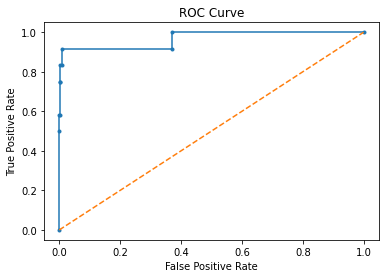

In [43]:
# trực quan 
plt.plot(fpr, tpr, marker='.')
plt.plot([0,1], [0,1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [44]:
print(roc_auc_score(y_true = y_test, y_score = score))

0.9682698730794923
